# COSC2753 Assignment 1

## Tran Thanh Tung - s3927562

---

## I. Importing Modules

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

RANDOM_STATE = 135 # Seed to reproduce results

---

## II. Exploratory Data Analysis

In [4]:
# Load datasets
diabetesTrain = pd.read_csv("data_train.csv", delimiter=',')
diabetesTest = pd.read_csv("data_test.csv", delimiter=',')

# Set pandas to display all columns
pd.options.display.max_columns = diabetesTrain.shape[1]

### 1. Overview

#### a. Train Dataset

In [5]:
diabetesTrain.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,0,1,24,1,0,0,1,0,1,0,1,0,2,0,0,0,0,8,4,5,60,0,0
1,1,0,0,1,28,0,0,0,1,1,1,0,1,0,1,1,0,0,0,2,6,8,0,-64,0
2,2,0,0,1,36,1,0,0,1,1,0,0,1,1,3,30,30,1,0,3,2,1,-46,0,0
3,3,0,1,1,35,0,0,0,1,1,1,0,1,0,3,0,0,0,0,8,6,8,-83,-188,0
4,4,0,1,1,27,0,0,0,1,0,1,0,1,0,3,0,0,0,0,9,5,4,-58,0,0


In [6]:
diabetesTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Id                    202944 non-null  int64
 1   HighBP                202944 non-null  int64
 2   HighChol              202944 non-null  int64
 3   CholCheck             202944 non-null  int64
 4   BMI                   202944 non-null  int64
 5   Smoker                202944 non-null  int64
 6   Stroke                202944 non-null  int64
 7   HeartDiseaseorAttack  202944 non-null  int64
 8   PhysActivity          202944 non-null  int64
 9   Fruits                202944 non-null  int64
 10  Veggies               202944 non-null  int64
 11  HvyAlcoholConsump     202944 non-null  int64
 12  AnyHealthcare         202944 non-null  int64
 13  NoDocbcCost           202944 non-null  int64
 14  GenHlth               202944 non-null  int64
 15  MentHlth              202944 non-n

In [7]:
diabetesTrain.describe()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,101471.500000,0.428700,0.424344,0.962655,28.379824,0.442634,0.040844,0.094391,0.756302,0.635372,0.811519,0.055912,0.951543,0.083693,2.514024,3.196971,4.256455,0.168707,0.439545,8.037449,5.050245,6.055641,-7.408660,-7.560041,0.175571
std,58585.030853,0.494891,0.494244,0.189607,6.612738,0.496700,0.197929,0.292372,0.429313,0.481327,0.391096,0.229752,0.214730,0.276928,1.070370,7.427247,8.736665,0.374494,0.496333,3.051568,0.985601,2.070140,75.993743,75.927137,0.380455
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,0.000000
25%,50735.750000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-55.000000,-55.000000,0.000000
50%,101471.500000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000
75%,152207.250000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,40.000000,40.000000,0.000000
max,202943.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,1.000000


The train dataset contains 202944 rows and 25 columns with no empty entries.

#### b. Test Dataset Overview

In [8]:
diabetesTest.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,202944,1,1,1,30,1,0,1,1,1,1,0,1,0,2,3,0,0,1,11,4,7,0,-145,NaN
1,202945,0,0,1,27,1,0,0,0,0,1,0,1,0,1,0,30,1,1,13,2,5,28,-145,NaN
2,202946,0,0,1,21,0,0,0,1,1,1,0,1,0,3,0,5,0,0,10,6,8,-26,72,NaN
3,202947,0,0,1,24,1,0,0,1,1,1,0,1,0,4,0,30,0,0,9,6,7,0,0,NaN
4,202948,1,0,1,34,0,0,0,1,1,0,0,1,0,4,0,1,1,0,11,4,7,-73,-63,NaN


In [9]:
diabetesTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50736 entries, 0 to 50735
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    50736 non-null  int64  
 1   HighBP                50736 non-null  int64  
 2   HighChol              50736 non-null  int64  
 3   CholCheck             50736 non-null  int64  
 4   BMI                   50736 non-null  int64  
 5   Smoker                50736 non-null  int64  
 6   Stroke                50736 non-null  int64  
 7   HeartDiseaseorAttack  50736 non-null  int64  
 8   PhysActivity          50736 non-null  int64  
 9   Fruits                50736 non-null  int64  
 10  Veggies               50736 non-null  int64  
 11  HvyAlcoholConsump     50736 non-null  int64  
 12  AnyHealthcare         50736 non-null  int64  
 13  NoDocbcCost           50736 non-null  int64  
 14  GenHlth               50736 non-null  int64  
 15  MentHlth           

In [10]:
diabetesTest.describe()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,0.0
mean,228311.500000,0.430207,0.423230,0.962729,28.392522,0.445305,0.039479,0.093366,0.757509,0.629789,0.811022,0.057336,0.949089,0.086112,2.500867,3.135978,4.184583,0.166292,0.443531,8.010801,5.051187,6.046811,-10.972189,-11.429202,NaN
std,14646.365966,0.495110,0.494076,0.189428,6.592550,0.497004,0.194733,0.290947,0.428594,0.482866,0.391495,0.232486,0.219817,0.280533,1.060819,7.354835,8.642537,0.372346,0.496806,3.064743,0.986477,2.075180,74.323238,74.525657,NaN
min,202944.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,NaN
25%,215627.750000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-57.000000,-58.000000,NaN
50%,228311.500000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,NaN
75%,240995.250000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,33.000000,32.000000,NaN
max,253679.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,NaN


The test dataset contains 50736 rows and 25 columns with no empty entries, except the 'Status' column which is completely blank.

#### c. Observations

- The column to be predicted is `Status`, which records whether the patient has (pre)diabetes (1) or not (0).

- Patient's ID (`Id`) has no correlation to the patient's health and will not be used for prediction.

In [11]:
diabetesTrain = diabetesTrain.drop('Id', axis=1)
diabetesTest = diabetesTest.drop('Id', axis=1)

- `ExtraMedTest` and `ExtraAlcoholTest` contain values out of range (-100, 100) as shown by `min` -199 and `max` 199.

In [12]:
diabetesTrainOutRange = diabetesTrain.loc[(diabetesTrain['ExtraMedTest'] <= -100) | (diabetesTrain['ExtraMedTest'] >= 100) 
                                          | (diabetesTrain['ExtraAlcoholTest'] <= -100) | (diabetesTrain['ExtraAlcoholTest'] >= 100)]
print(f"% rows with error values: {diabetesTrainOutRange.shape[0] / diabetesTrain.shape[0] * 100}%")

% rows with error values: 32.503547776726585%


Since nearly a third of the data contains erroneous values in at least one of the two attributes, it is not feasible to remove all of it; instead, these values will be replaced with the mean of the valid entries. This will only be done on the train dataset so we can evaluate our model's performance against incorrect data.

In [13]:
diabetesTrain.loc[(diabetesTrain['ExtraMedTest'] <= -100) | (diabetesTrain['ExtraMedTest'] >= 100), 
                  'ExtraMedTest'] = round(diabetesTrain.loc[(diabetesTrain['ExtraMedTest'] > -100) & (diabetesTrain['ExtraMedTest'] < 100)]['ExtraMedTest'].mean())
diabetesTrain.loc[(diabetesTrain['ExtraAlcoholTest'] <= -100) | (diabetesTrain['ExtraAlcoholTest'] >= 100), 
                  'ExtraAlcoholTest'] = round(diabetesTrain.loc[(diabetesTrain['ExtraAlcoholTest'] > -100) & (diabetesTrain['ExtraAlcoholTest'] < 100)]['ExtraAlcoholTest'].mean())

diabetesTrainOutRange = diabetesTrain.loc[(diabetesTrain['ExtraMedTest'] <= -100) | (diabetesTrain['ExtraMedTest'] >= 100) 
                                          | (diabetesTrain['ExtraAlcoholTest'] <= -100) | (diabetesTrain['ExtraAlcoholTest'] >= 100)]
print(f"% rows with error values: {diabetesTrainOutRange.shape[0] / diabetesTrain.shape[0] * 100}%")

% rows with error values: 0.0%


In [14]:
diabetesTrain.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,0.428700,0.424344,0.962655,28.379824,0.442634,0.040844,0.094391,0.756302,0.635372,0.811519,0.055912,0.951543,0.083693,2.514024,3.196971,4.256455,0.168707,0.439545,8.037449,5.050245,6.055641,-3.610641,-3.761575,0.175571
std,0.494891,0.494244,0.189607,6.612738,0.496700,0.197929,0.292372,0.429313,0.481327,0.391096,0.229752,0.214730,0.276928,1.070370,7.427247,8.736665,0.374494,0.496333,3.051568,0.985601,2.070140,44.400760,44.371416,0.380455
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-99.000000,-99.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-24.000000,-24.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,-4.000000,-4.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,8.000000,7.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,99.000000,99.000000,1.000000


### 2. Data Visualization

#### a. Histogram Plot

Text(0.5, 1.02, 'Histogram Plot with Distribution Curve')

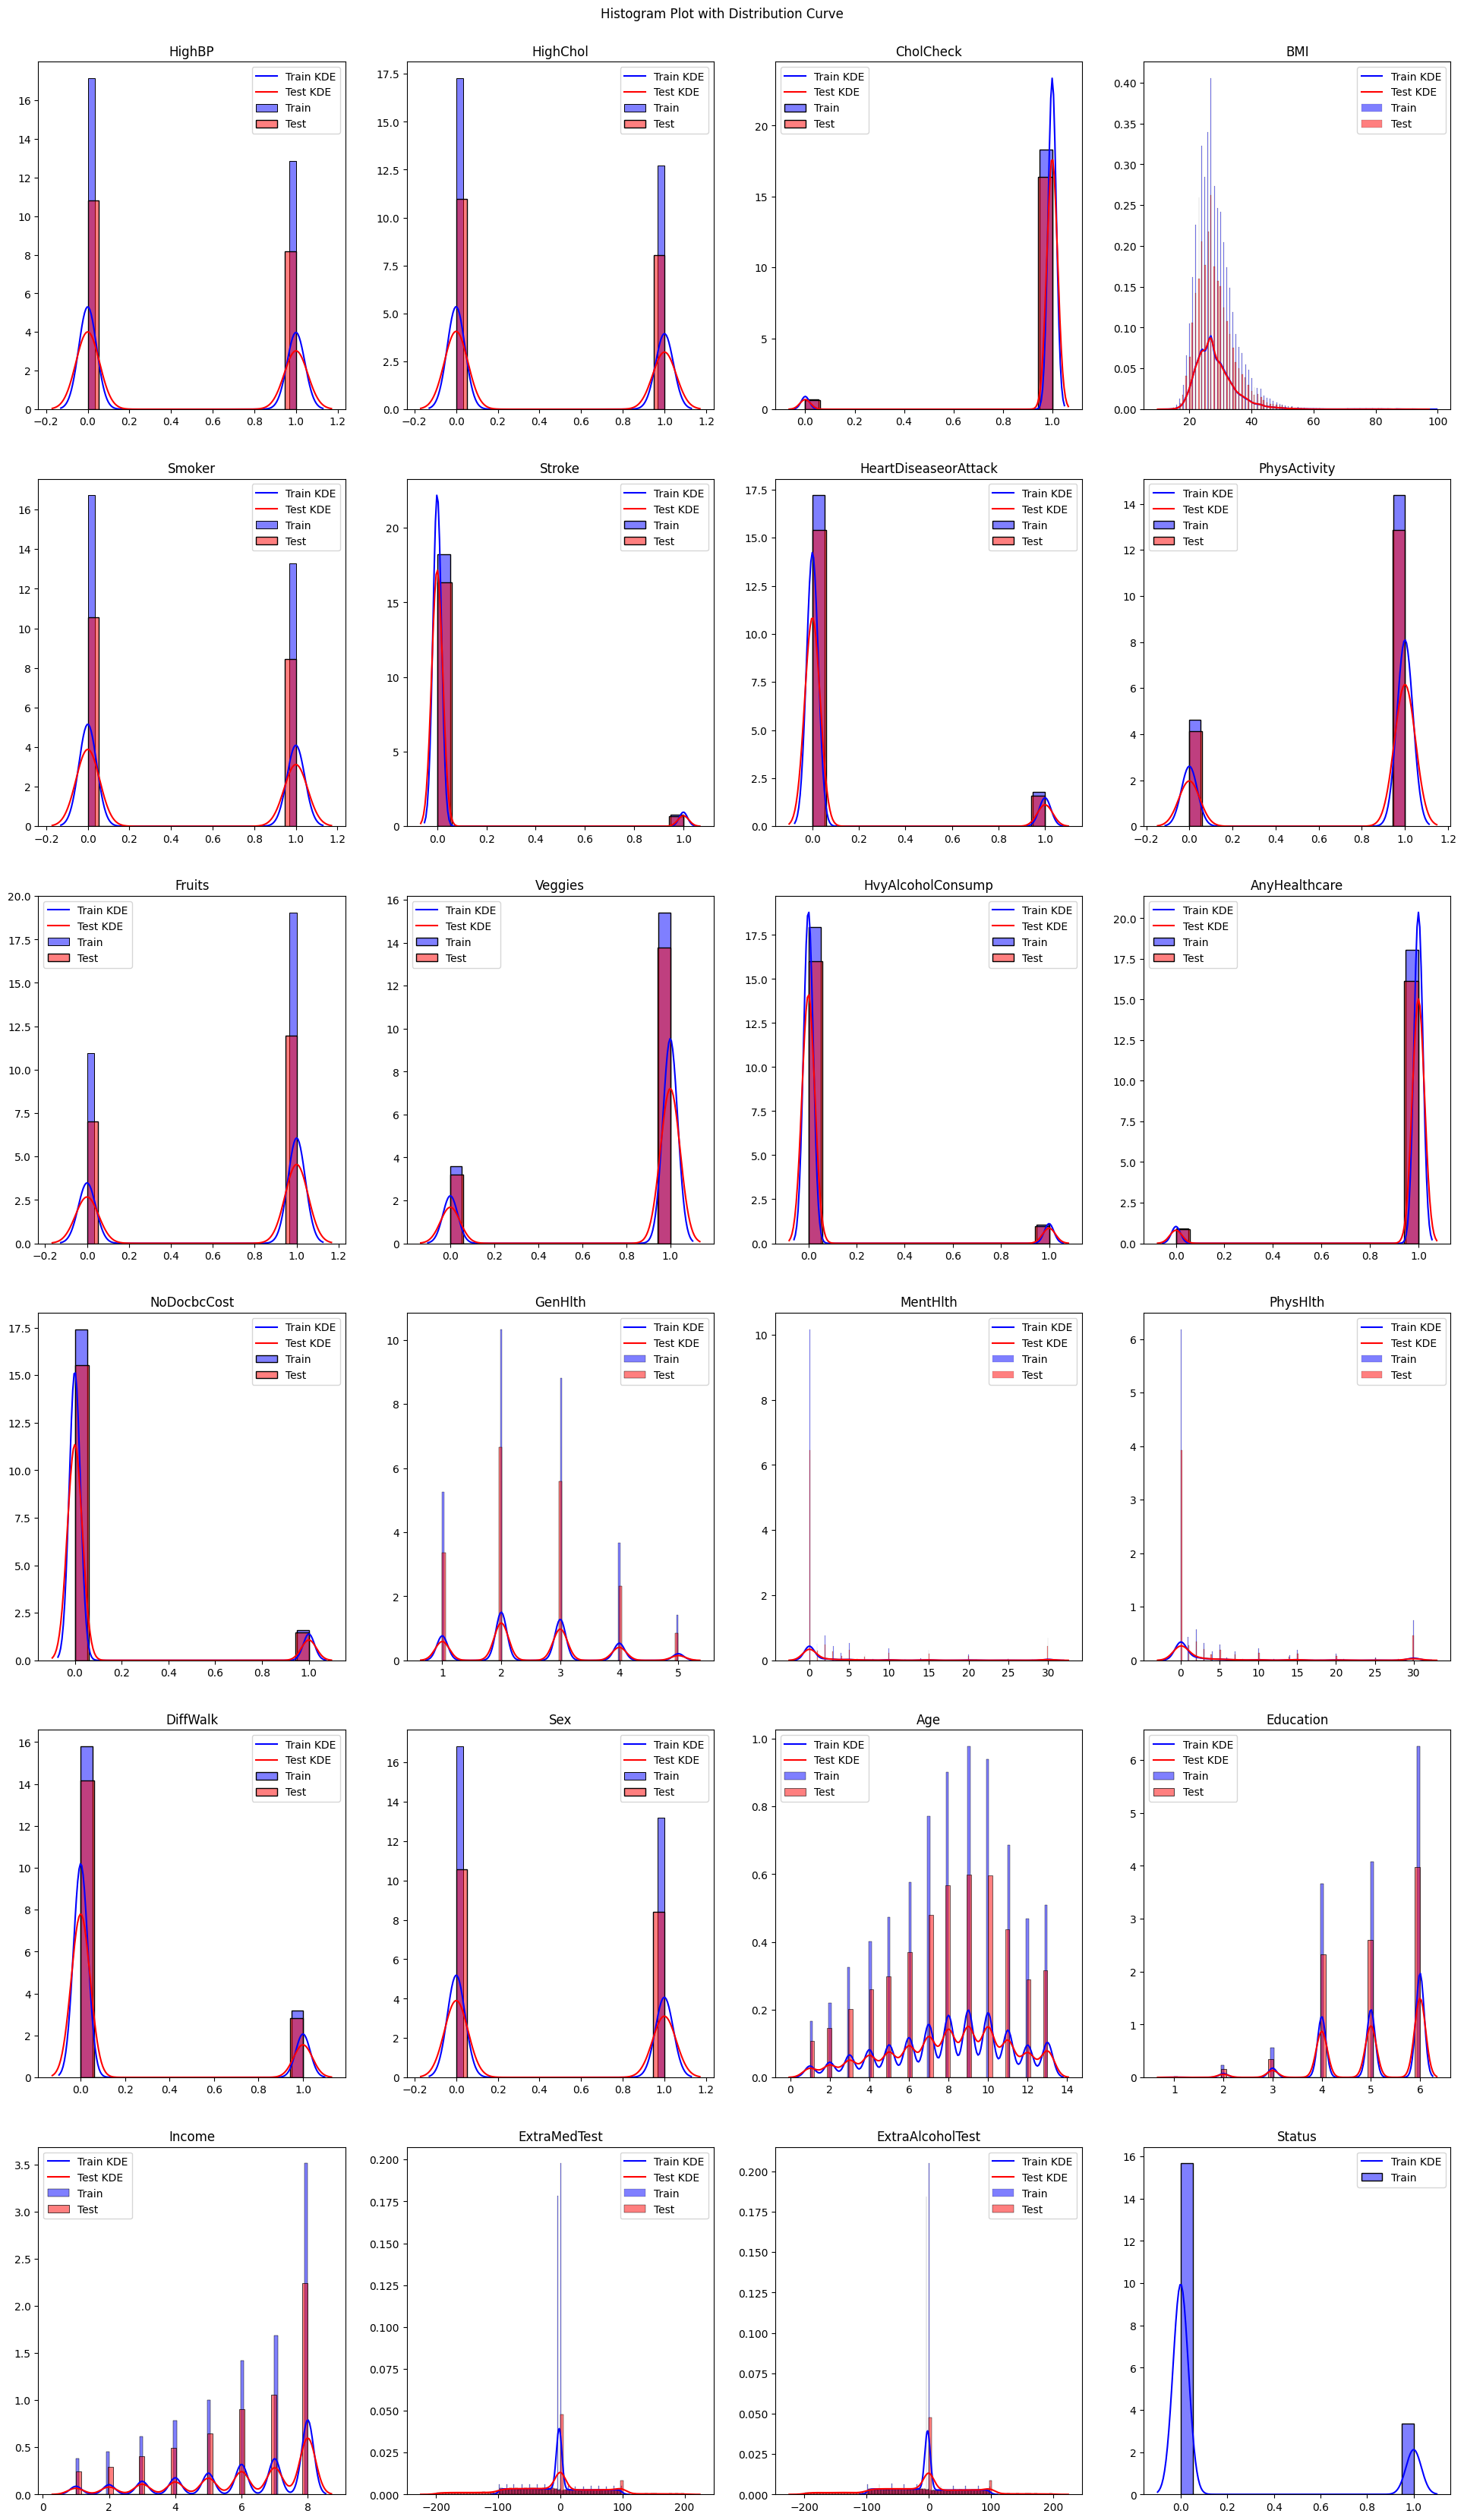

In [15]:
plt.figure(figsize=(24, 36))

for i, col in enumerate(diabetesTrain.columns):
    plt.subplot(6, 4, i + 1)
    plt.subplots_adjust(top=1)
    sns.histplot(diabetesTrain[col], label="Train", stat='density', kde=True, kde_kws=dict(cut=3), line_kws=dict(label="Train KDE"), color='b')
    if (col != 'Status'):
        sns.histplot(diabetesTest[col], label="Test", stat='density', kde=True, kde_kws=dict(cut=3), line_kws=dict(label="Test KDE"), color='r')
    plt.xlabel("")
    plt.ylabel("")
    plt.title(col)
    plt.legend()

plt.suptitle("Histogram Plot with Distribution Curve", y=1.02)

- Data distribution is similar between train and test datasets, which means the trained model should perform well on the test dataset
- Features `BMI`, `Stroke`, `HeartDiseaseorAttack`, `HvyAlcoholConsump`, `NoDocbcCost`, `MentHlth`, `PhysHlth`, `DiffWalk` are heavily skewed left
- Features `HighBP`, `HighChol`, `Smoker`, `GenHlth`, and `Sex` are slightly skewed left
- Feature `Age` is slightly skewed right
- Features `CholCheck`, `PhysActivity`, `Fruits`, `Veggies`, `AnyHealthcare`, `Education`, and `Income`, are heavily skewed right
- Target `Status` is heavily imbalanced with 4:1 ratio
- `MentHlth` and `PhysHlth` may have outliers

#### b. Box/Count Plot

Text(0.5, 0.9, 'Box/Count Plot for Train Dataset, divided by Status')

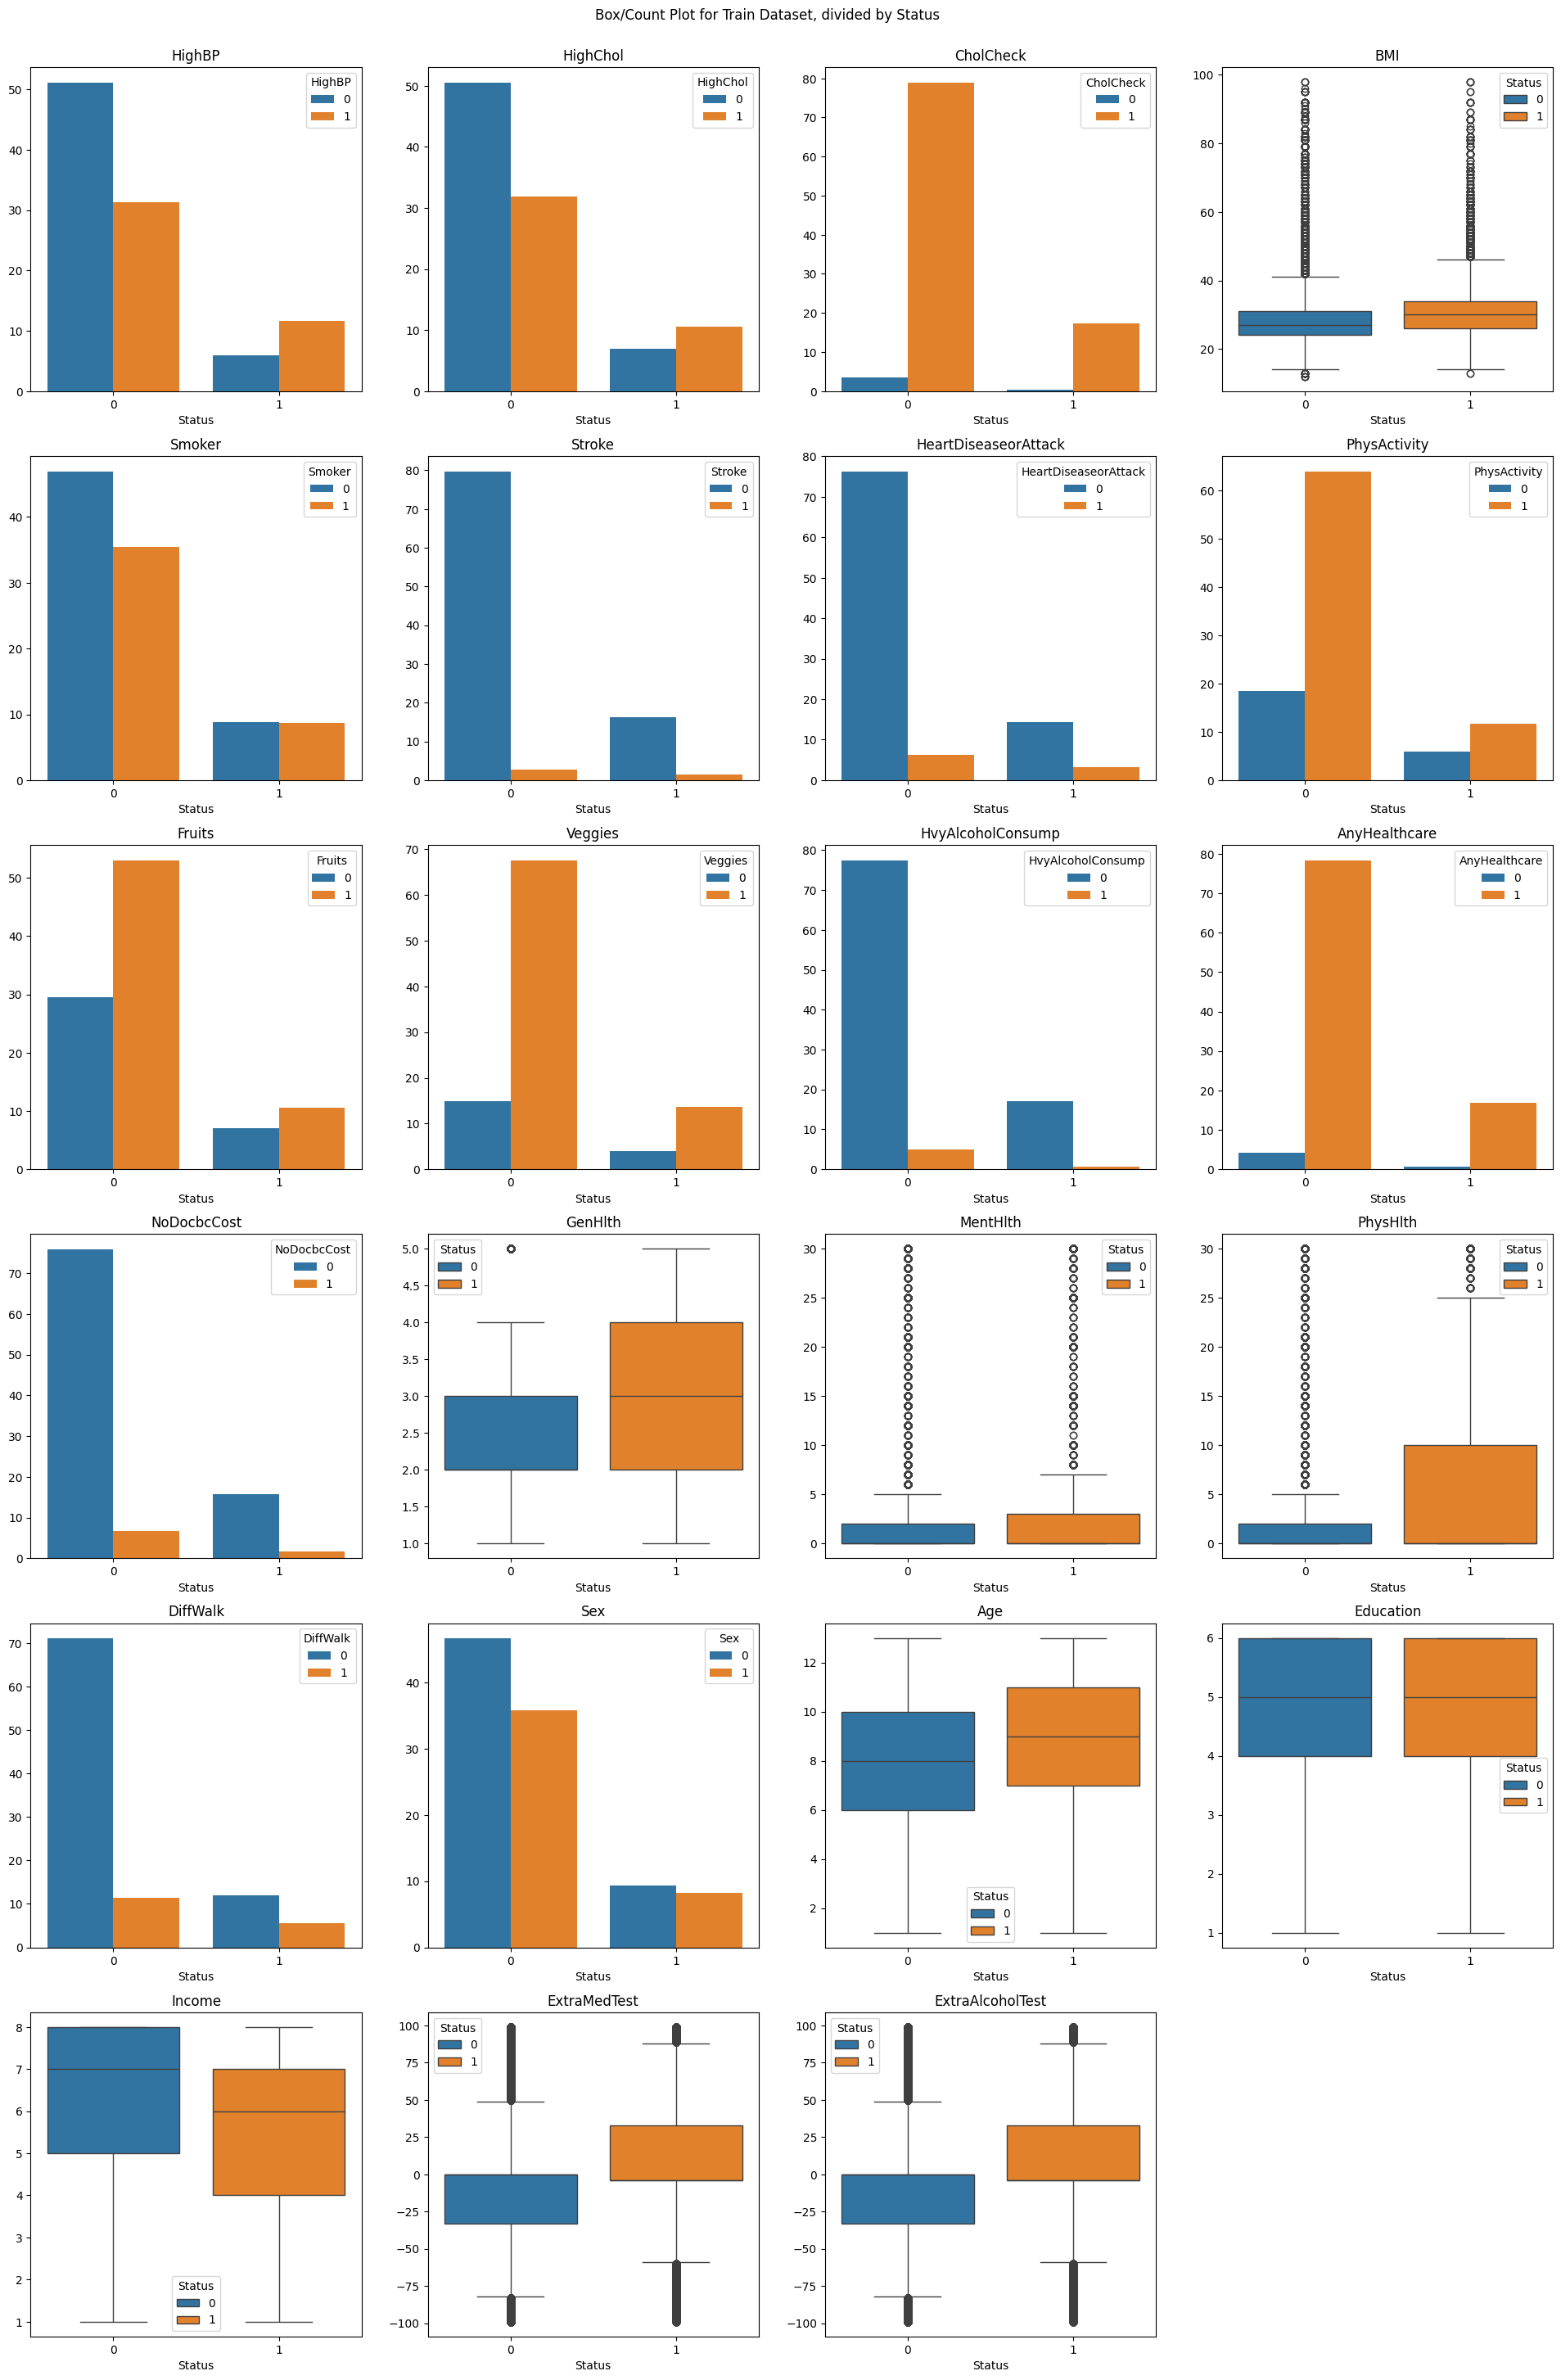

In [16]:
plt.figure(figsize=(24, 36))

for i, col in enumerate(diabetesTrain.drop('Status', axis=1).columns):
    plt.subplot(6, 4, i + 1)
    if col not in['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income', 'ExtraMedTest', 'ExtraAlcoholTest']:
        sns.countplot(diabetesTrain, x='Status', hue=col, stat='percent')
    else:
        sns.boxplot(diabetesTrain, x='Status', y=col, hue='Status')
    plt.ylabel("")
    plt.title(col)

plt.suptitle("Box/Count Plot for Train Dataset, divided by Status", y=0.9)

- Most variables show some correlations to diabetes status
- There is no clear outliers (categorical data, huge range of outliers)

Text(0.5, 0.9, 'Box Plot for Train and Test Datasets')

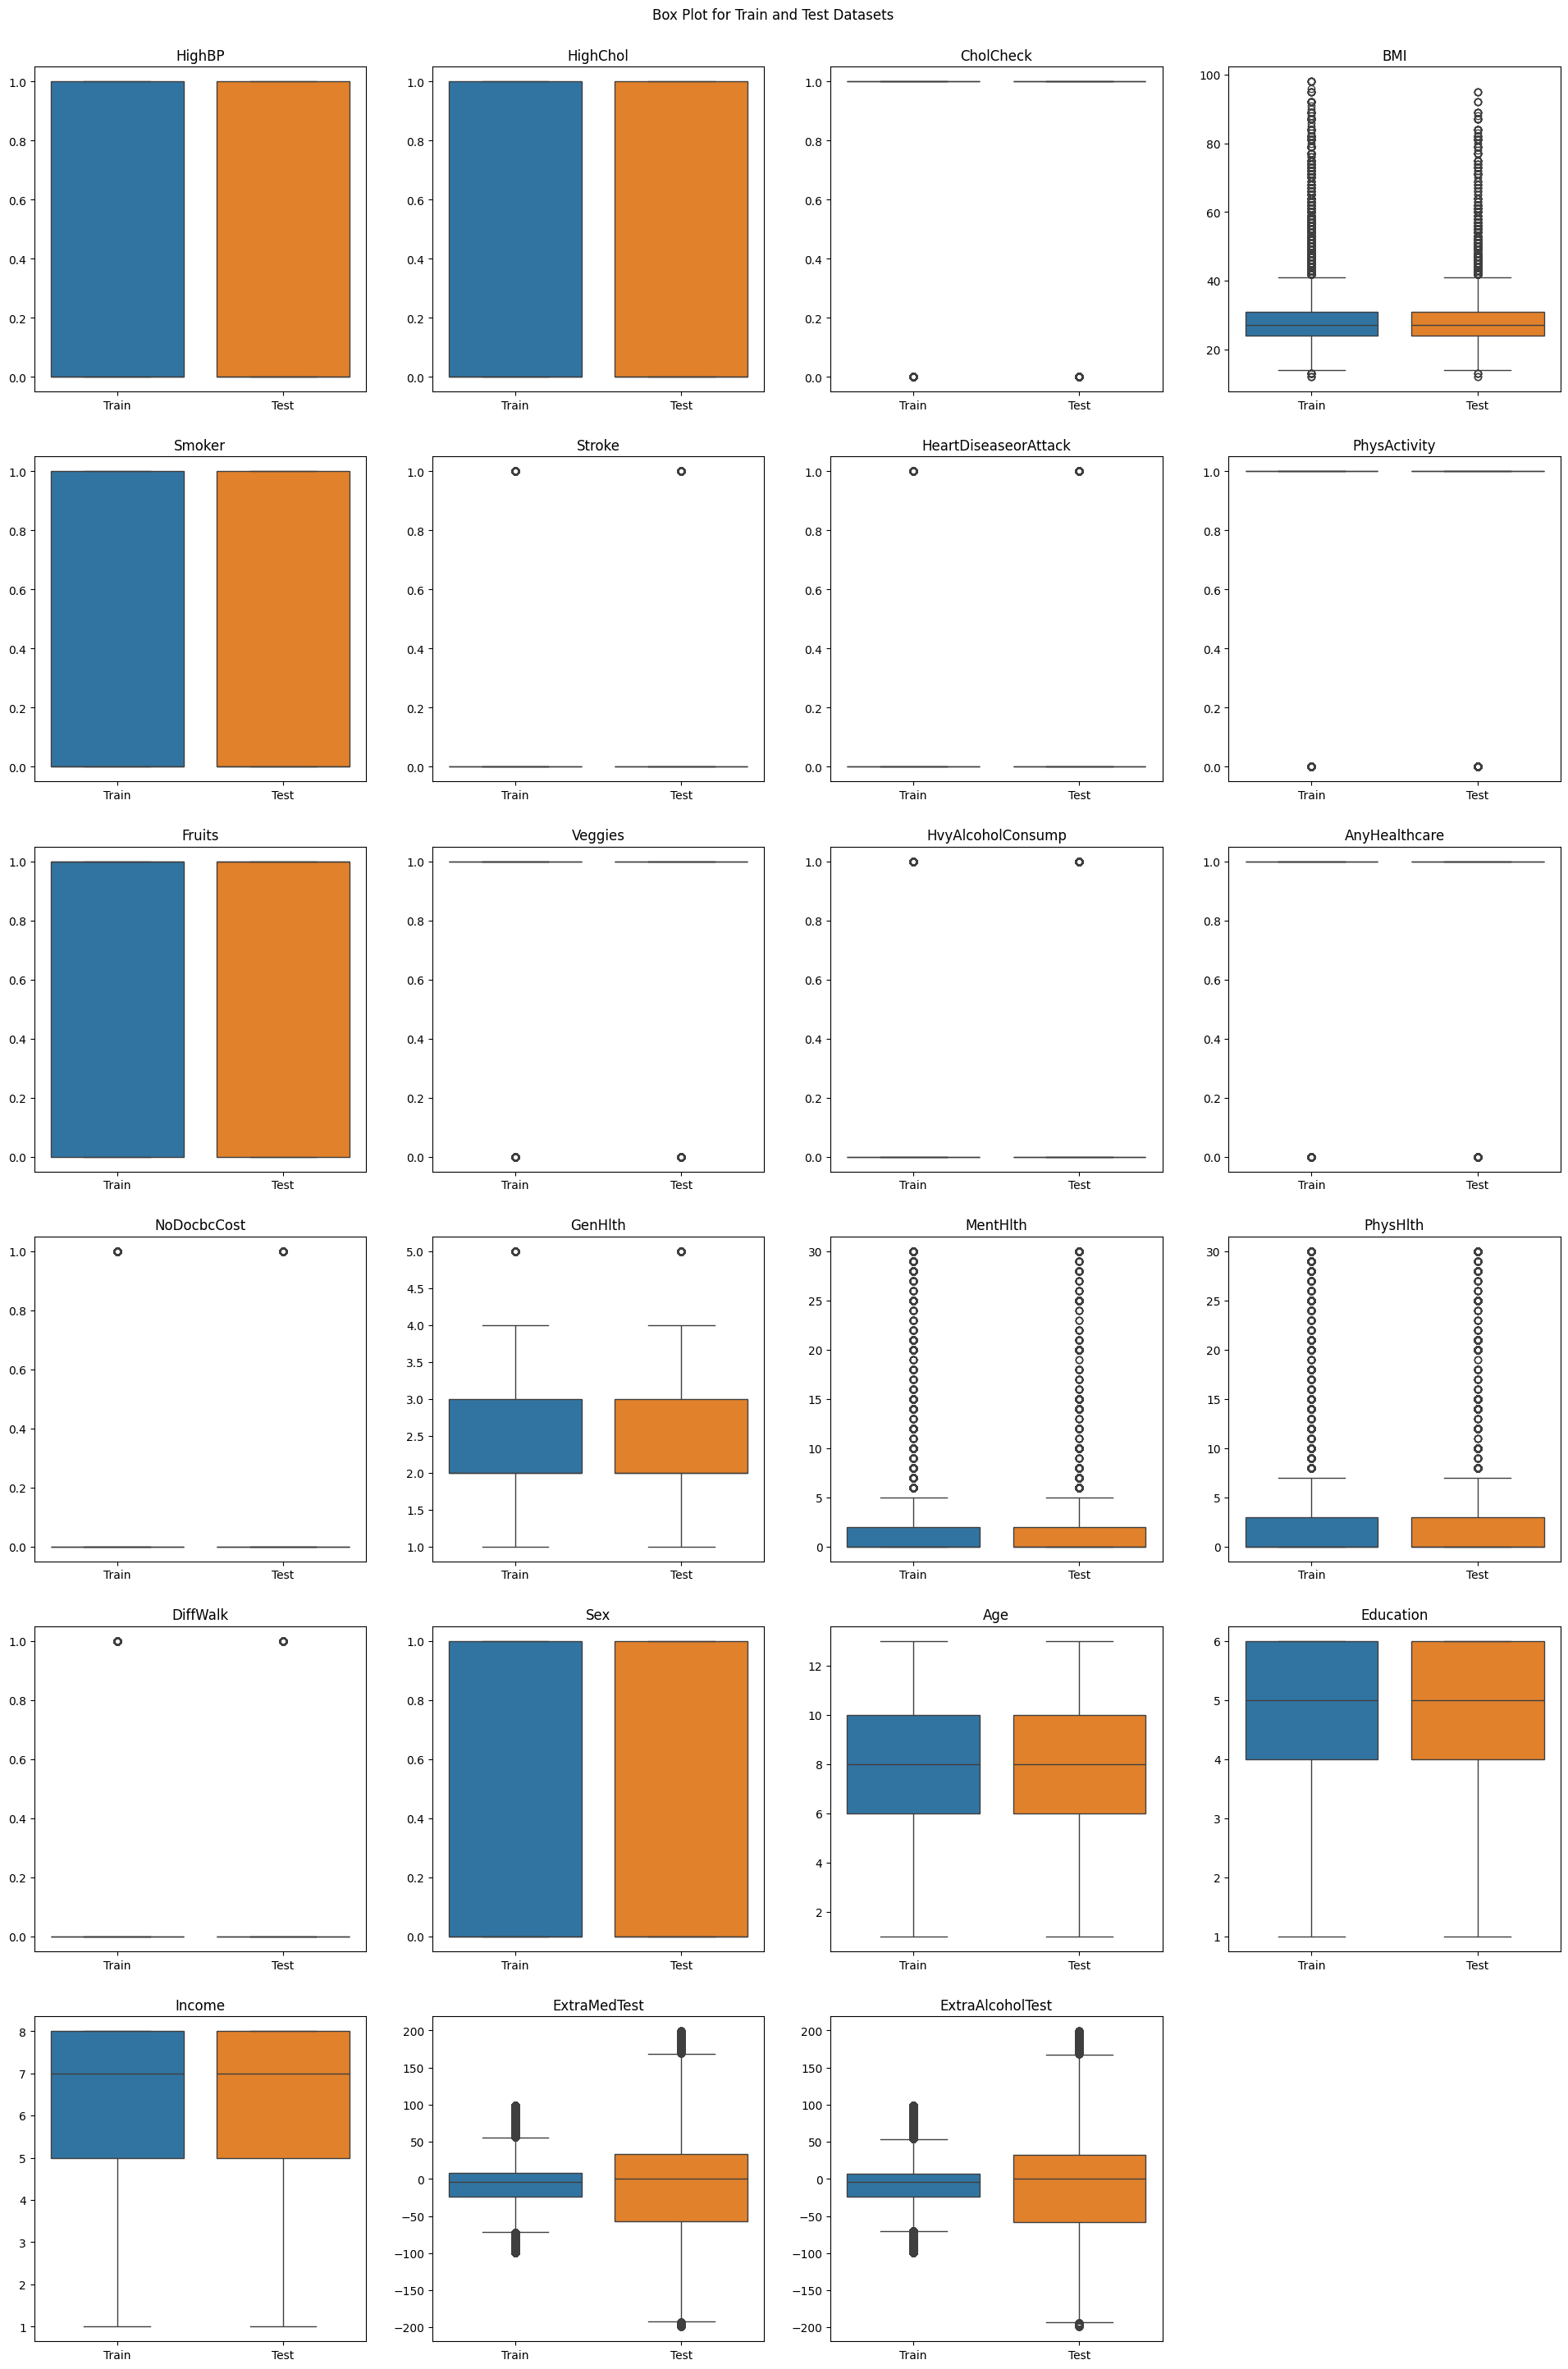

In [17]:
plt.figure(figsize=(24, 36))

for i, col in enumerate(diabetesTrain.drop('Status', axis=1).columns):
    plt.subplot(6, 4, i + 1)
    tmp = pd.concat([diabetesTrain[col].rename('Train'), diabetesTest[col].rename('Test')], axis=1)
    sns.boxplot(pd.melt(tmp), x='variable', y='value', hue='variable')
    plt.xlabel("")
    plt.ylabel("")
    plt.title(col)

plt.suptitle("Box Plot for Train and Test Datasets", y=0.9)

Box plot is similar between datasets, except for `ExtraMedTest` and `ExtraAlcoholTest` as those were processed for the train dataset.

#### c. Correlation Plot

Text(0.45, 0.93, 'Correlation Plot for Train Dataset')

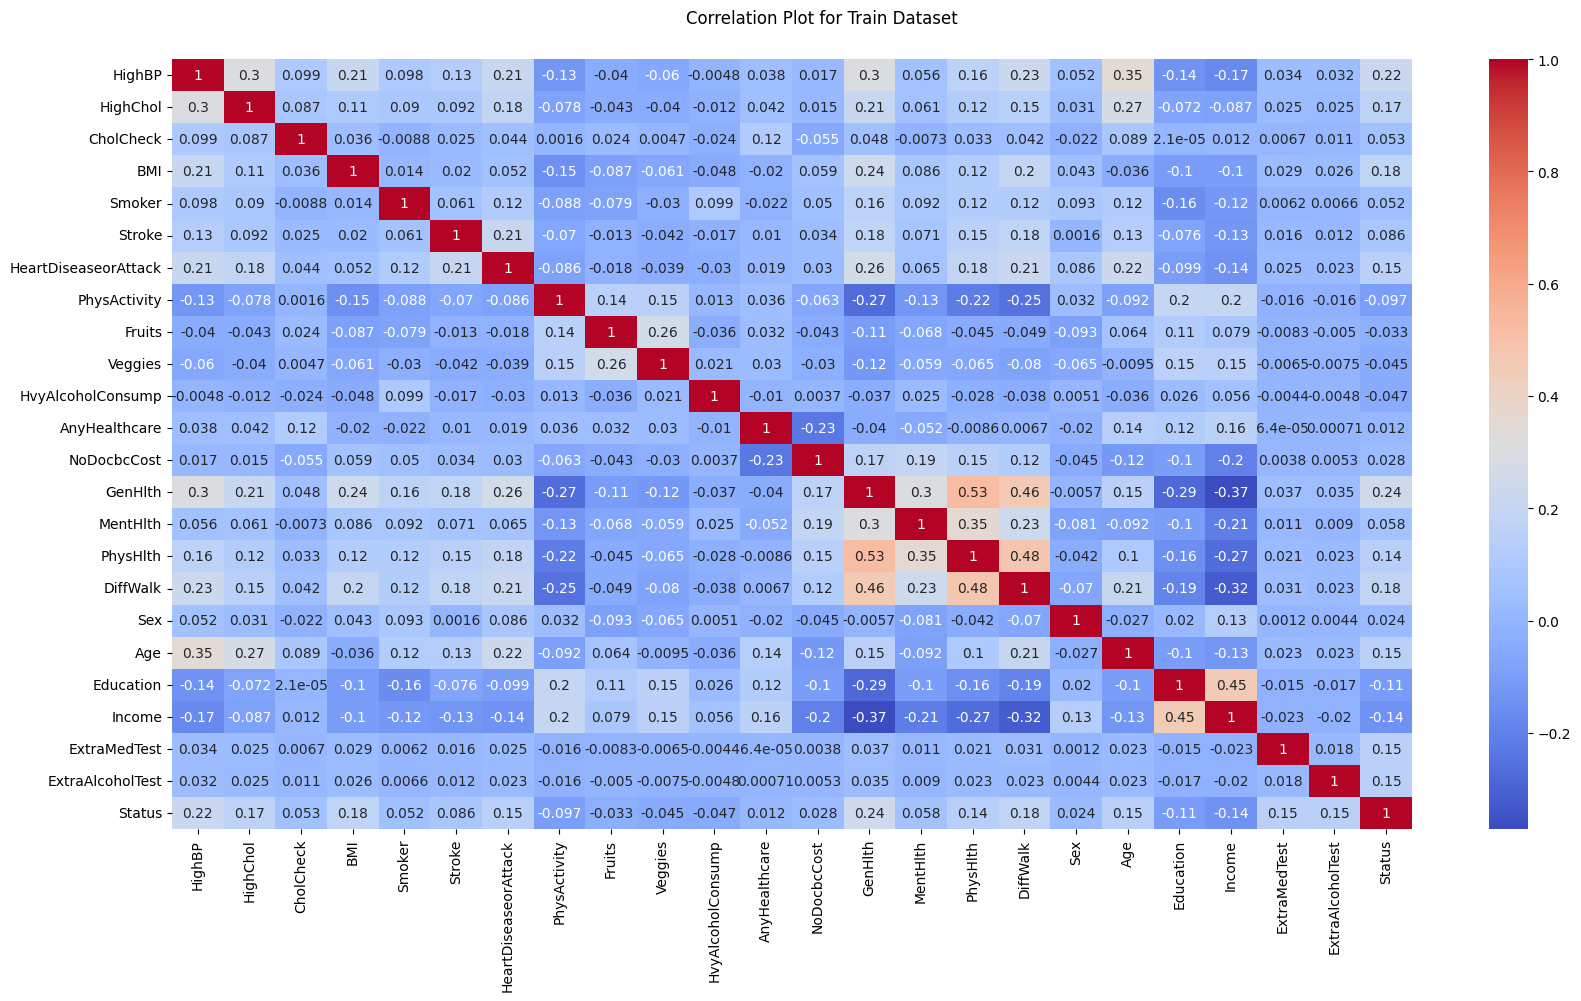

In [18]:
plt.figure(figsize=(20, 10))
sns.heatmap(diabetesTrain.corr(), annot=True, cmap='coolwarm')
plt.suptitle("Correlation Plot for Train Dataset", x=0.45, y=0.93)

- Features with highest correlations to diabetes status (> 0.15): `GenHlth`, `HighBP`, `BMI`, `DiffWalk`, `HighChol`, `HeartDiseaseorAttack`, `Age`
- Significant correlations:
    + `Income` and `Education` (0.45)
    + `GenHlth`, `PhysHlth`, `DiffWalk` cluster (0.46 - 0.53)
    + `HighBP` with `Age` (0.35) and `GenHlth` (0.30)
    + `Income` with `GenHlth` (0.37) and `DiffWalk` (0.32)
- These correlations has also been observed in many researches; however, since they have vastly different correlation with diabetes status as shown above, it is difficult to remove any features without expecting poor model performance, unless features correlations are extremely high (i.e., > 0.9).
- Other features show low to no correlation

Text(0.45, 0.93, 'Correlation Plot for Test Dataset')

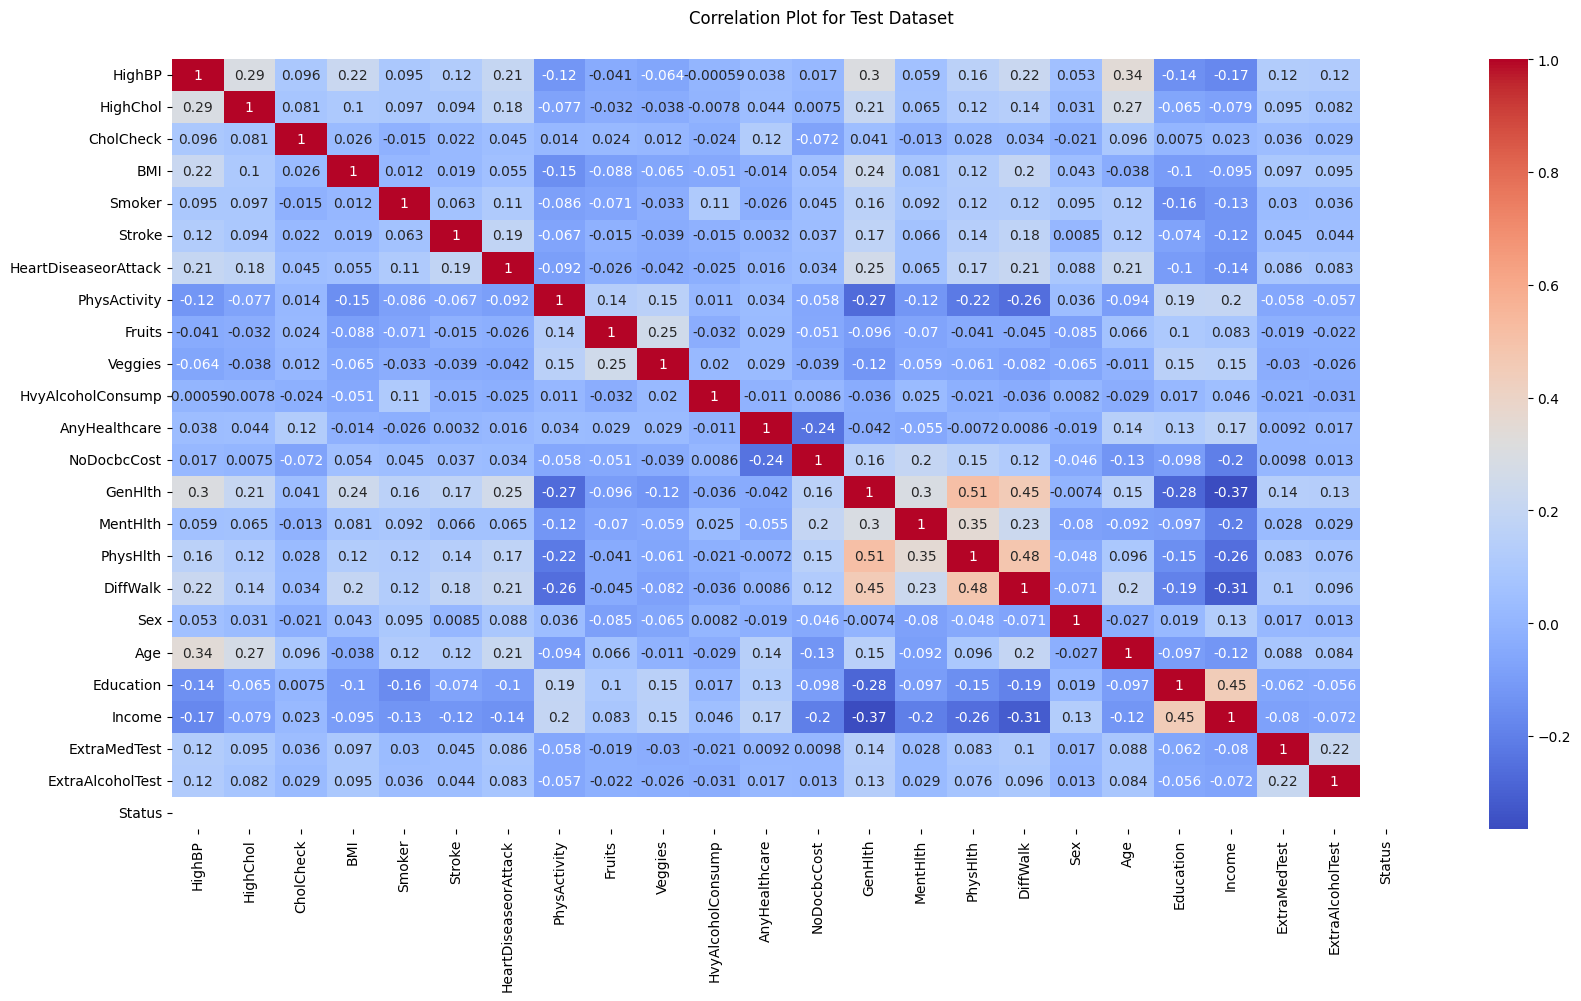

In [19]:
plt.figure(figsize=(20, 10))
sns.heatmap(diabetesTest.corr(), annot=True, cmap='coolwarm')
plt.suptitle("Correlation Plot for Test Dataset", x=0.45, y=0.93)

Correlations between features on test dataset shows similar result to that of train dataset.

### 3. Data Processing

#### a. Data Splitting

In [20]:
trainX = diabetesTrain.drop('Status', axis=1)
trainY = diabetesTrain[['Status']]

trainX, validX, trainY, validY = train_test_split(trainX, trainY, test_size=0.2, random_state=RANDOM_STATE)

#### b. Data Scaling

In [21]:
scaler = StandardScaler()

trainX = scaler.fit_transform(trainX)
validX = scaler.transform(validX)

#### c. Data Balancing (Train Dataset only)

In [22]:
smote = SMOTE(random_state=RANDOM_STATE)

trainX, trainY = smote.fit_resample(trainX, trainY)

## III. Model Proposal and Implementation

Taking into account problem type (binary classification) and assignment limiations, the following algorithms will be tested:
- Logistic Regressio
- Decision Tree
- Random Forest

K-Fold Cross Validations and Grid Search will be used to fine tune hyperparamters.

The models will be compared using Classification Report, ROC-AUC, and Confusion Matrix.

In [23]:
kFold = KFold(5, shuffle=True, random_state=RANDOM_STATE)

# Function to print results
def result(realY, predictY, probabilityY, text=""):
    print(text)
    print(classification_report(realY, predictY))
    print(f"ROC-AUC: {roc_auc_score(realY, probabilityY, average='macro')}")
    ConfusionMatrixDisplay(confusion_matrix(realY, predictY)).plot(cmap='Blues', values_format='d')

### 1. Logistic Regression

#### a. Baseline

In [24]:
# 'saga' solver is better when dealing with large dataset and suppports both L1 and L2 regularization
logReg = LogisticRegression(solver='saga', class_weight='balanced', max_iter=1000, random_state=RANDOM_STATE)

#### b. Hyperparameters

In [25]:
hyperLogReg = {
    'C': 1 / np.logspace(-5, 2, 50),
    'penalty': ['l1', 'l2']
}

#### c. Training

In [26]:
gridLogReg = GridSearchCV(logReg, hyperLogReg, cv=kFold, scoring='f1_macro', refit='f1_macro')
gridLogReg.fit(trainX, trainY.values.ravel())

predictTrainYLogReg = gridLogReg.predict(trainX)
predictTrainProbabilityYLogReg = gridLogReg.predict_proba(trainX)[:, 1]
predictValidYLogReg = gridLogReg.predict(validX)
predictValidProbabilityYLogReg = gridLogReg.predict_proba(validX)[:, 1]
print(f"Best parameters: {gridLogReg.best_params_}")

Best parameters: {'C': 0.1, 'penalty': 'l1'}


Train Data
              precision    recall  f1-score   support

           0       0.72      0.71      0.71    133823
           1       0.71      0.72      0.72    133823

    accuracy                           0.72    267646
   macro avg       0.72      0.72      0.72    267646
weighted avg       0.72      0.72      0.72    267646

ROC-AUC: 0.7822746793163636


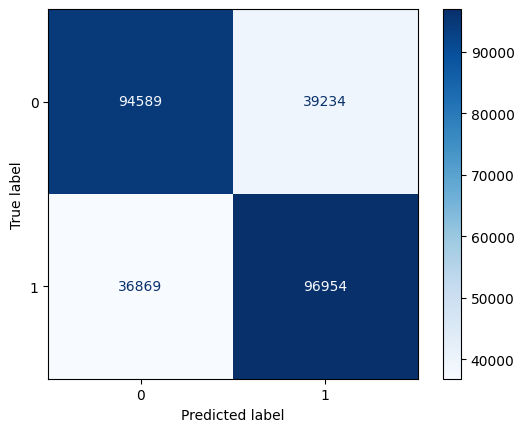

In [27]:
result(trainY, predictTrainYLogReg, predictTrainProbabilityYLogReg, text="Train Data")

Validate Data
              precision    recall  f1-score   support

           0       0.92      0.71      0.80     33490
           1       0.34      0.71      0.46      7099

    accuracy                           0.71     40589
   macro avg       0.63      0.71      0.63     40589
weighted avg       0.82      0.71      0.74     40589

ROC-AUC: 0.7786267404166749


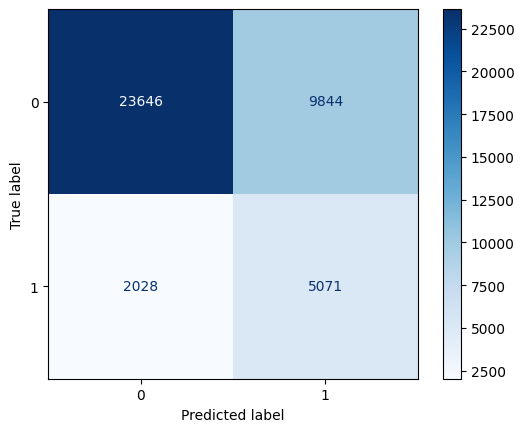

In [28]:
result(validY, predictValidYLogReg, predictValidProbabilityYLogReg, text="Validate Data")

### 2. Decision Tree

#### a. Baseline

In [29]:
dTree = DecisionTreeClassifier(criterion='gini', class_weight='balanced', random_state=RANDOM_STATE)

#### b. Hyperparameters

In [30]:
hyperDTree = {
    'max_depth': np.arange(2, 102, 10),
    'min_samples_split': np.arange(2, 22, 2)
}

#### c. Training

In [31]:
gridDTree = GridSearchCV(dTree, hyperDTree, cv=kFold, scoring='f1_macro', refit='f1_macro')
gridDTree.fit(trainX, trainY.values.ravel())

predictTrainYDTree = gridDTree.predict(trainX)
predictTrainProbabilityYDTree = gridDTree.predict_proba(trainX)[:, 1]
predictValidYDTree = gridDTree.predict(validX)
predictValidProbabilityYDTree = gridDTree.predict_proba(validX)[:, 1]
print(f"Best parameters: {gridDTree.best_params_}")

Best parameters: {'max_depth': 22, 'min_samples_split': 20}


Train Data
              precision    recall  f1-score   support

           0       0.93      0.94      0.94    133823
           1       0.94      0.93      0.94    133823

    accuracy                           0.94    267646
   macro avg       0.94      0.94      0.94    267646
weighted avg       0.94      0.94      0.94    267646

ROC-AUC: 0.9875484925588268


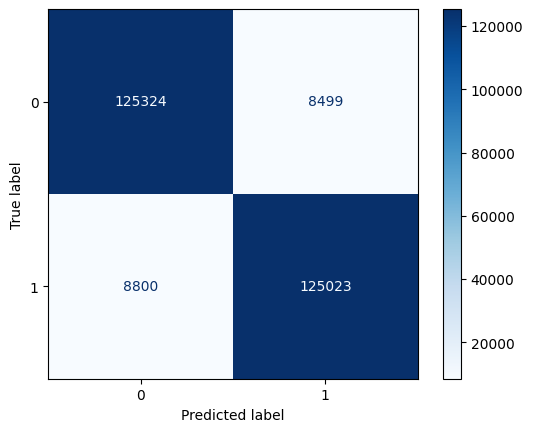

In [32]:
result(trainY, predictTrainYDTree, predictTrainProbabilityYDTree, text="Train Data")

Validate Data
              precision    recall  f1-score   support

           0       0.92      0.89      0.90     33490
           1       0.54      0.62      0.58      7099

    accuracy                           0.84     40589
   macro avg       0.73      0.75      0.74     40589
weighted avg       0.85      0.84      0.84     40589

ROC-AUC: 0.8403717655908622


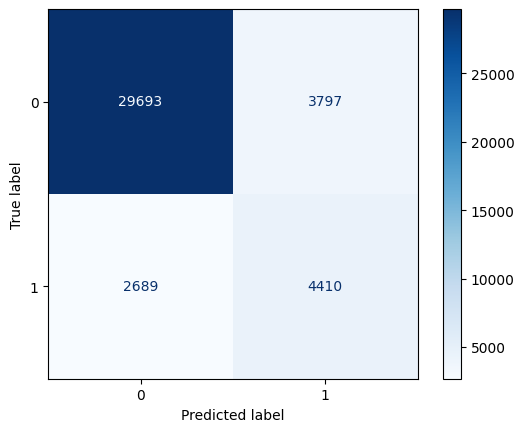

In [33]:
result(validY, predictValidYDTree, predictValidProbabilityYDTree, text="Validate Data")

#### d. Post Prunning

In [34]:
path = DecisionTreeClassifier(criterion='gini', class_weight='balanced', max_depth=gridDTree.best_params_['max_depth'], 
                                   min_samples_split=gridDTree.best_params_['min_samples_split'], random_state=RANDOM_STATE).cost_complexity_pruning_path(trainX, trainY.values.ravel())
ccp_alphas, impurities = path.ccp_alphas, path.impurities
len(ccp_alphas)

5448

In [35]:
postPrunes = []
for ccp_alpha in ccp_alphas[::10]: # Reduce number of models to test
    prunedDTree = DecisionTreeClassifier(criterion='gini', class_weight='balanced', max_depth=gridDTree.best_params_['max_depth'], 
                                   min_samples_split=gridDTree.best_params_['min_samples_split'], ccp_alpha=ccp_alpha, random_state=RANDOM_STATE)
    prunedDTree.fit(trainX, trainY.values.ravel())
    postPrunes.append(prunedDTree)

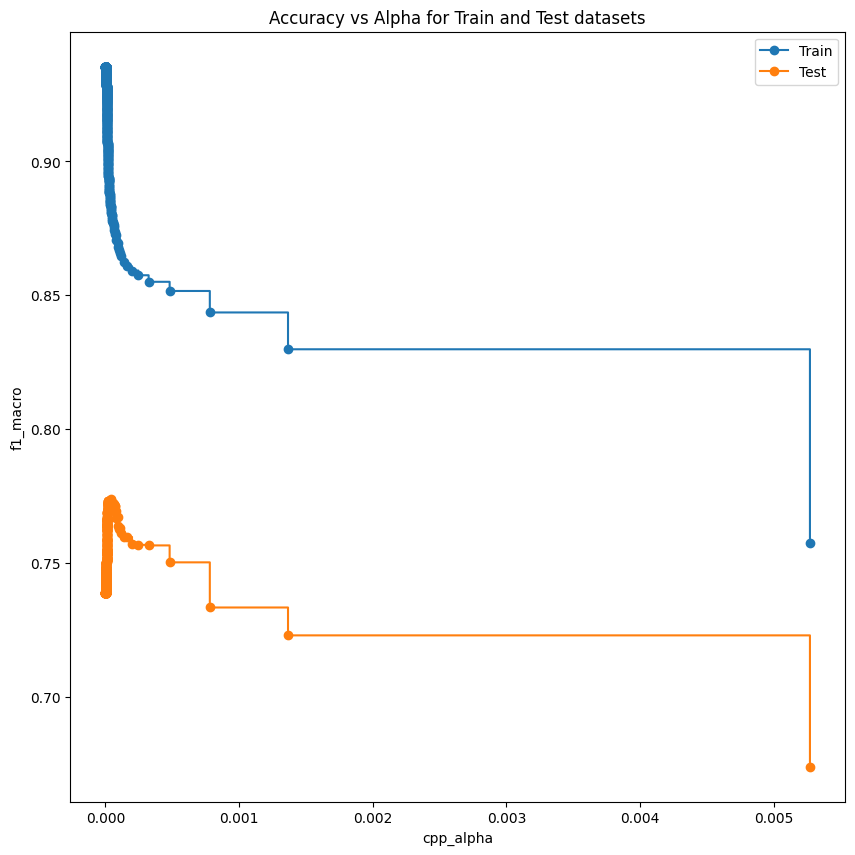

In [37]:
trainScores = [f1_score(trainY, postPrune.predict(trainX), average='macro') for postPrune in postPrunes]
validScores = [f1_score(validY, postPrune.predict(validX), average='macro') for postPrune in postPrunes]

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel("cpp_alpha")
ax.set_ylabel("f1_macro")
ax.set_title("Accuracy vs Alpha for Train and Test datasets")
ax.plot(ccp_alphas[::10], trainScores, marker='o', label="Train", drawstyle='steps-post')
ax.plot(ccp_alphas[::10], validScores, marker='o', label="Test", drawstyle='steps-post')
ax.legend()
plt.show()

In [38]:
print(f"Best ccp_alpha: {ccp_alphas[validScores.index(max(validScores)) * 10]}")

Best ccp_alpha: 4.25385456171469e-05


#### e. Final Model

In [39]:
dTreeFinal = DecisionTreeClassifier(criterion='gini', class_weight='balanced', max_depth=gridDTree.best_params_['max_depth'],
                                    min_samples_split=gridDTree.best_params_['min_samples_split'], ccp_alpha=ccp_alphas[validScores.index(max(validScores)) * 10], random_state=RANDOM_STATE)
dTreeFinal.fit(trainX, trainY.values.ravel())

predictTrainYDTreeFinal = dTreeFinal.predict(trainX)
predictTrainProbabilityYDTreeFinal = dTreeFinal.predict_proba(trainX)[:, 1]
predictValidYDTreeFinal = dTreeFinal.predict(validX)
predictValidProbabilityYDTreeFinal = dTreeFinal.predict_proba(validX)[:, 1]

Train Data
              precision    recall  f1-score   support

           0       0.88      0.88      0.88    133823
           1       0.88      0.88      0.88    133823

    accuracy                           0.88    267646
   macro avg       0.88      0.88      0.88    267646
weighted avg       0.88      0.88      0.88    267646

ROC-AUC: 0.9534490289336081


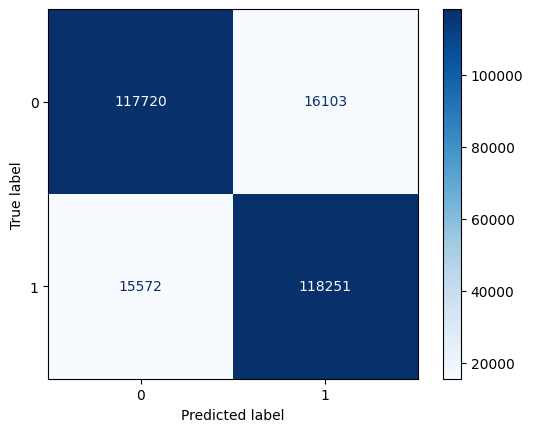

In [40]:
result(trainY, predictTrainYDTreeFinal, predictTrainProbabilityYDTreeFinal, text="Train Data")

Validate Data
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     33490
           1       0.56      0.75      0.64      7099

    accuracy                           0.85     40589
   macro avg       0.75      0.81      0.77     40589
weighted avg       0.88      0.85      0.86     40589

ROC-AUC: 0.9054580883567477


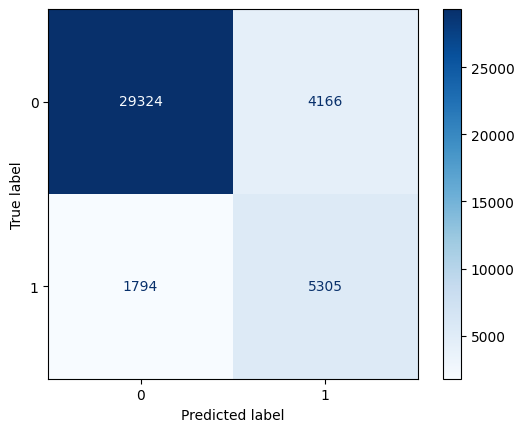

In [41]:
result(validY, predictValidYDTreeFinal, predictValidProbabilityYDTreeFinal, text="Validate Data")

### 3. Random Forest

#### a. Baseline

In [42]:
forest = RandomForestClassifier(criterion='gini', class_weight='balanced', random_state=RANDOM_STATE)

#### b. Hyperparameters

In [43]:
hyperForest = {
    'n_estimators': np.arange(100, 301, 100),
    'max_depth': np.arange(5, 16, 5)
}

#### c. Training

In [44]:
gridForest = GridSearchCV(forest, hyperForest, cv=kFold, scoring='f1_macro', refit='f1_macro')
gridForest.fit(trainX, trainY.values.ravel())

predictTrainYForest = gridForest.predict(trainX)
predictTrainProbabilityYForest = gridForest.predict_proba(trainX)[:, 1]
predictValidYForest = gridForest.predict(validX)
predictValidProbabilityYForest = gridForest.predict_proba(validX)[:, 1]
print(f"Best parameters: {gridForest.best_params_}")

Train Data
              precision    recall  f1-score   support

           0       0.93      0.92      0.93    133823
           1       0.93      0.93      0.93    133823

    accuracy                           0.93    267646
   macro avg       0.93      0.93      0.93    267646
weighted avg       0.93      0.93      0.93    267646

ROC-AUC: 0.9285847724232755


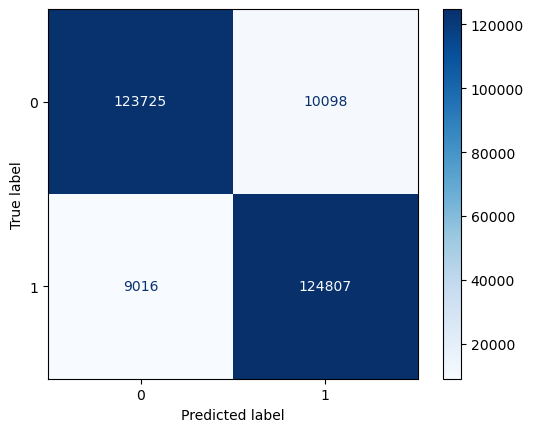

In [ ]:
result(trainY, predictTrainYForest, predictTrainProbabilityYForest, text="Train Data")

Validate Data
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     33490
           1       0.61      0.68      0.64      7099

    accuracy                           0.87     40589
   macro avg       0.77      0.79      0.78     40589
weighted avg       0.87      0.87      0.87     40589

ROC-AUC: 0.7933677843169361


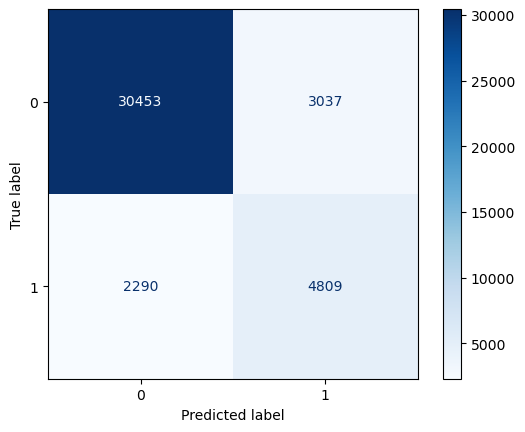

In [ ]:
result(validY, predictValidYForest, predictValidProbabilityYForest, text="Validate Data")

## IV. Model Comparison

Logistic Regression: AUC: 0.7786267404166749, F1: 0.6300221289287533
Decision Tree: AUC: 0.9054580883567477, F1: 0.774032591108668
Random Forest: AUC: 0.8923076254941682, F1: 0.7815657668119407


Text(0.5, 1.0, 'ROC Curve')

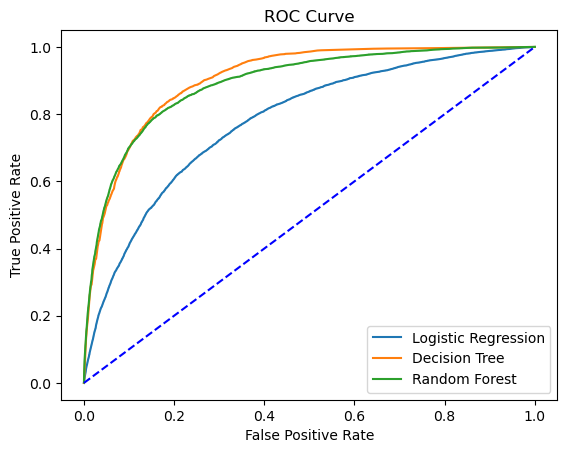

In [ ]:
models = {
    'Logistic Regression': gridLogReg,
    'Decision Tree': dTreeFinal,
    'Random Forest': gridForest
}

for name, model in models.items():
    probabilityY = model.predict_proba(validX)[:, 1]
    predictY = model.predict(validX)

    fpr, tpr, _ = roc_curve(validY, probabilityY)
    sns.lineplot(x=fpr, y=tpr, label=f"{name}")
    print(f"{name}: ROC-AUC: {auc(fpr, tpr)}, F1: {f1_score(validY, predictY, average='macro')}")

plt.plot([0, 1], [0, 1], linestyle='--', color='b')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

- Decision Tree and Random Forest both performed better than Logistic Regression
- Decision Tree and Random Forest performed very similarly on validation
- All models did not perform well on 'Positive' on validation, likely due to 'Positive' being upsampled by a lot and overfitting

**Final Choice: Decision Tree**
- Performed best alongside Random Forest
- Less computationally expensive than Random Forest therefore can do more hyperparameters tuning within a reasonable timeframe
- Many hyperparameters for optimization and regularization for both before and after forming the tree model

## V. Model Evaluation

In [ ]:
diabetesPredict = dTreeFinal.predict(scaler.transform(diabetesTest.drop('Status', axis=1)))

finalPredict = pd.read_csv("s1234567_predictions.csv", delimiter=',')
finalPredict['Status'] = diabetesPredict
finalPredict.to_csv("COSC2753_A1_Predictions_s3927562.csv", index=False)